In [31]:
import sys 
sys.path.append('/home/jason/Documents/myscripts')
path_t = "/home/jason/my_temp/"

In [35]:
from neo4j import *
import densestgraph.greedy_algorithms
import networkx as nx
from matplotlib import pyplot as plt

In [12]:
# toy graph
rel_name_t= "toy"
toy1 = """
CREATE (:label1 { name:  "_1"})
CREATE (:label1 { name:  "_2"})
CREATE (:label1 { name:  "_3"})
CREATE (:label1 { name:  "_4"})
"""
toy2      = """
MATCH (a:label1 { name: "_1"})
MATCH (b:label1 { name: "_2" }) CREATE (a)-[:"""+ rel_name_t +""" ]->(b);
"""
toy3      = """
MATCH (a:label1 { name: "_2"})
MATCH (b:label1 { name: "_3" }) CREATE (a)-[:"""+ rel_name_t +""" ]->(b);
"""
toy4      = """
MATCH (a:label1 { name: "_3"})
MATCH (b:label1 { name: "_4" }) CREATE (a)-[:"""+ rel_name_t +""" ]->(b);
"""
toy5      = """
MATCH (a:label1 { name: "_4"})
MATCH (b:label1 { name: "_2" }) CREATE (a)-[:"""+ rel_name_t +""" ]->(b);
"""
toyx      = """
CREATE (:label1 { name:  "_29"})
"""

# delete all
delete_all = """
MATCH (n)
DETACH DELETE n
"""
# constrain
index_unique_neo = "CREATE CONSTRAINT ON (g:label1) ASSERT g.bn IS UNIQUE;"
index_neo = "CREATE INDEX ON :label1(name);"

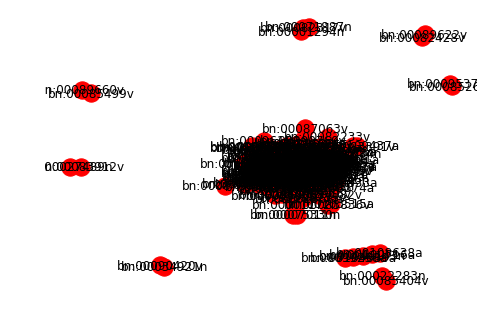

----nodes in densest g---
bn:00003341n
bn:00026697n
bn:00064855n
bn:00017395n
bn:15703357n
bn:00052341n
bn:00012953n
bn:00043358n
bn:00004629n
bn:01770876n
bn:00069665n
bn:00057267n
bn:03372037n
bn:00015991n
bn:00005006n
bn:00037640n
bn:00054585n
bn:00017027n
bn:00052430n
bn:00134174n
bn:00016317n
bn:00034225n
bn:00032512n
bn:00015187n
bn:00041983n
bn:00065004n
bn:01399078n
bn:00228224n
bn:01106943n
bn:00061013n
bn:00021555n
bn:00030802n
bn:00011396n
bn:00010543n
bn:00040801n
bn:00254324n
bn:00019262n
bn:00081668n
bn:01807953n
bn:00015144n
bn:03307859n
bn:00067446n
bn:00079632n
bn:00006073n
bn:14292402n
bn:00020705n
bn:00049127n
bn:00015784n
bn:00055706n
bn:00004222n
bn:00078838n
bn:00031254n
bn:00070188n
bn:00685618n
bn:00011346n
bn:00027038n
bn:00027546n
bn:00058964n
bn:00011999n
bn:03411501n
bn:00006850n
bn:00051453n
bn:00037726n
bn:00004972n
bn:00054278n
bn:00034028n
bn:03301610n
bn:00044576n
bn:00054285n
bn:00046716n
bn:00030765n
bn:00745013n
bn:01645431n
bn:00045642n
bn:00055564n

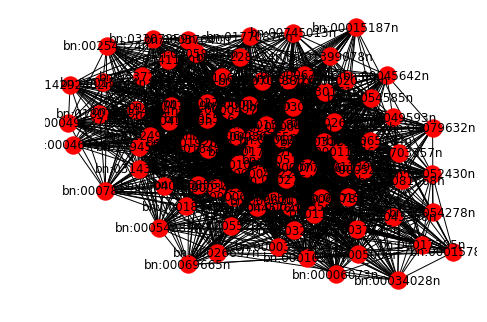

In [48]:
#G = nx.fast_gnp_random_graph(10,0.4)
G =nx.read_edgelist(path_t+"doc_ent_0",delimiter=" ", create_using=nx.Graph())
nx. draw(G,with_labels = True)
plt.show();

densest_g = densestgraph.greedy_algorithms.greedy_triangle_graph_density(G)


print ("----nodes in densest g---")
for node in densest_g.nodes():
    print (node)
nx. draw(densest_g,with_labels = True)
plt.show();

In [1]:
from neo4j import *

def login_db(uriToServer = "bolt://localhost:7687",usr = "neo4j", pwd = "jason"):
    return GraphDatabase.driver(uriToServer, auth=(usr, pwd))     

def create_nodes(f_name, label = "label1", commit = 0, limit=100):
    expectation = """
    USING PERIODIC COMMIT 5000
    LOAD CSV FROM "file:///babel_nodes" AS line
    WITH line LIMIT 4
    CREATE (a:label1 { bn: line[0] })
    
    """
     
    quote = '"'
    newline= "\n"
    path_file = quote + "file:///"+f_name + quote
    
    commit_inst =  "USING PERIODIC COMMIT "+ str(commit)+newline if commit > 0 else ""    
    load_inst = "LOAD CSV FROM " + path_file + " AS line" +newline
    limit_inst = "WITH line LIMIT " +str(limit) +newline if limit > 0 else ""
    create_node_inst = "CREATE (a:"+label+" { bn: line[0] })"
    
    query = commit_inst + load_inst + limit_inst + create_node_inst
    return query

def create_relation(f_name, delimiter =" ", commit = 50000, limit=1000):
    expectation = """
    USING PERIODIC COMMIT 20000
    LOAD CSV FROM "file:///babel_outputx" AS line
    FIELDTERMINATOR ' '
    MATCH (a:label1 { bn:  line[0]})
    MATCH (b:label1 { bn:  line[1] })
    CREATE (a)-[:rel{ bn:  line[2] } ]->(b);    
    """
     
    quote = '"'
    newline= "\n"
    path_file = quote + "file:///"+f_name + quote
    
    commit_inst =  "USING PERIODIC COMMIT "+ str(commit)+newline if commit > 0 else ""    
    load_inst = "LOAD CSV FROM " + path_file + " AS line" +newline
    delimiter_int = "FIELDTERMINATOR " +quote + delimiter+quote + newline
    limit_inst = "WITH line LIMIT " +str(limit) +newline if limit > 0 else ""
    
    create_edges_inst = """WITH line, toInteger(line[2]) as my_rel_type
MATCH (a:label1 { bn:  line[0]})
MATCH (b:label1 { bn:  line[1] })
CREATE (a)-[:rel{ bn:  my_rel_type } ]->(b);   
"""
    
    query = commit_inst + load_inst + delimiter_int + limit_inst + create_edges_inst
    return query

def create_relation2(f_name, delimiter =" ", commit = 50000, limit=1000):
    expectation = """
    USING PERIODIC COMMIT 20000
    LOAD CSV FROM "file:///babel_outputx" AS line
    FIELDTERMINATOR ' '
    MATCH (a:label1 { bn:  line[0]})
    MATCH (b:label1 { bn:  line[1] })
    CREATE (a)-[:rel{ bn:  line[2] } ]->(b);    
    """
     
    quote = '"'
    newline= "\n"
    path_file = quote + "file:///"+f_name + quote
    
    commit_inst =  "USING PERIODIC COMMIT "+ str(commit)+newline if commit > 0 else ""    
    load_inst = "LOAD CSV FROM " + path_file + " AS line" +newline
    delimiter_int = "FIELDTERMINATOR " +quote + delimiter+quote + newline
    limit_inst = "WITH line LIMIT " +str(limit) +newline if limit > 0 else ""
    
    create_edges_inst = """WITH line, toInteger(line[2]) as my_rel_type
MATCH (a:verb { bn:  line[0]})
MATCH (b:noun { bn:  line[1] })
CREATE (a)-[:rel{ bn:  my_rel_type } ]->(b);   
"""
    
    query = commit_inst + load_inst + delimiter_int + limit_inst + create_edges_inst
    return query

def currentdb_summary():
    all_rel ="MATCH ()-->() RETURN count(*);"
    all_nodes ="MATCH (n) RETURN count(n)"
    with graphDB_Driver.session() as graphDB_Session:    
        query = graphDB_Session.run(all_nodes)    
        query = graphDB_Session.run(all_rel)
        summary_query(query)

def summary_query(query):
    # now include also statement, ram
    print(query.consume().counters)
    time1 = query.consume().result_available_after
    time2 = query.consume().result_consumed_after
    total_t = time1+time2
    print("time1 = " , time1)
    print("time2 = " , time2)
    print("time total = " , total_t)
    
def test_queries():
    print(create_nodes("file")) 
    print("\n") 
    print(create_relation("babel_outputx"))


    #WITH line LIMIT 95005
read_loop0  = """USING PERIODIC COMMIT 20000
LOAD CSV FROM "file:///babel_outputN2" AS line
FIELDTERMINATOR '\t'
MATCH (pivote:label1 {bn: line[0]})
WITH pivote, SPLIT(line[1]," ") AS neigborgs_full
UNWIND neigborgs_full AS neigborg_full
  WITH pivote, SPLIT(neigborg_full,"$") AS neigborg_splited
  MATCH (neig:label1 {bn:neigborg_splited[0]})
  CREATE (pivote)-[:my_rel {bn:neigborg_splited[1]}]->(neig)
"""
read_loop  = """USING PERIODIC COMMIT 20000
LOAD CSV FROM "file:///babel_outputN3" AS line
FIELDTERMINATOR '\t'
WITH line LIMIT 95005
MATCH (pivote:label1) WHERE ID(pivote)= toInteger(line[0])
WITH pivote, SPLIT(line[2]," ") AS neigborgs_full
UNWIND neigborgs_full AS neigborg_full
  WITH pivote, SPLIT(neigborg_full,"$") AS neigborg_splited
  MATCH (neig:label1 {bn:neigborg_splited[0]})
  CREATE (pivote)-[:my_rel {bn:neigborg_splited[1]}]->(neig)
"""
delete_self_loops = """
MATCH (t0:label1)-[r:rel]->(t0)
WITH r LIMIT 20
DELETE r
"""

def shortest_path_query(node1, node2):
    # use double {} to escape the real {}
    return """MATCH path=shortestPath((a:label1 {{bn:"{0}"}})-[*0..4]->(b:label1 {{bn:"{1}"}}))
    RETURN relationships(path)""".format(node1,node2)

def subgraph_from_nodes(node_list, aslist = True):
    str_node_list = "['"+"','".join(node_list)+"']" if aslist else node_list
    query = """WITH {0} as names
MATCH (n:label1)
WHERE n.bn in names
WITH collect(n) as nodes
UNWIND nodes as n1
match (n1)-[r]->(n2)
WHERE n2 in nodes
return n1.bn, type(r), n2.bn, nodes""".format(str_node_list)
    return query

print (read_loop)    
#test_queries()
graphDB_Driver = login_db()
print(shortest_path_query("bn:01110439n","bn:01110435n"))

USING PERIODIC COMMIT 20000
LOAD CSV FROM "file:///babel_outputN3" AS line
FIELDTERMINATOR '	'
WITH line LIMIT 95005
MATCH (pivote:label1) WHERE ID(pivote)= toInteger(line[0])
WITH pivote, SPLIT(line[2]," ") AS neigborgs_full
UNWIND neigborgs_full AS neigborg_full
  WITH pivote, SPLIT(neigborg_full,"$") AS neigborg_splited
  MATCH (neig:label1 {bn:neigborg_splited[0]})
  CREATE (pivote)-[:my_rel {bn:neigborg_splited[1]}]->(neig)

MATCH path=shortestPath((a:label1 {bn:"bn:01110439n"})-[*0..4]->(b:label1 {bn:"bn:01110435n"}))
    RETURN relationships(path)


In [31]:
with graphDB_Driver.session() as graphDB_Session:    
    #query = graphDB_Session.run(toyx)
    #query = graphDB_Session.run(index_unique_neo)
    #query = graphDB_Session.run(delete_all)
    #query = graphDB_Session.run(create_nodes("lexical_col_nodesv", label= "verb", commit=10000,limit=0))
    #query = graphDB_Session.run(create_relation2("lexical_col",commit=45000,limit=0))
    #query = graphDB_Session.run(read_loop)
    #query = graphDB_Session.run(shortestPath)
    summary_query(query)

{'constraints_added': 1}
('time1 = ', 832)
('time2 = ', 0)
('time total = ', 832)


In [43]:
#graphDB_Driver = login_db()
mylist = ['bn:01110439n','bn:01110435n','bn:18318312n']
with open('/home/jason/my_temp/entp.csv') as f:
    lines = [line.rstrip('\n') for line in f]
myresults = []
with graphDB_Driver.session() as graphDB_Session:    
    #query = graphDB_Session.run(toyx)
    #query = graphDB_Session.run(constrain_bn)
    #query = graphDB_Session.run(delete_all)
    #query = graphDB_Session.run(create_nodes("babel_nodes",commit=1000000,limit=0))
    #query = graphDB_Session.run(create_relation("babel_outputx",commit=45000,limit=0))
    #query = graphDB_Session.run(read_loop)
    #query = graphDB_Session.run(shortestPath)

    for mylist in lines:
        query = graphDB_Session.run(subgraph_from_nodes(mylist, aslist=False))
        eachfile = []
        for record in query:
            #print (record)
            #nodes = record["path"].nodes
            rec = record.values()
            eachfile.append(rec)            
            print (rec)
        myresults.append(eachfile)            

            #for node in record:
                #print(node,"\n"*3)
        #summary_query(query)

    

[u'bn:00109764a', u'rel', u'bn:00067446n']
[u'bn:00109764a', u'rel', u'bn:00032512n']
[u'bn:00109764a', u'rel', u'bn:00067446n']
[u'bn:00109764a', u'rel', u'bn:00067446n']
[u'bn:00109764a', u'rel', u'bn:00067446n']
[u'bn:00087896v', u'rel', u'bn:00019262n']
[u'bn:00087896v', u'rel', u'bn:00019262n']
[u'bn:00001941n', u'rel', u'bn:03145217n']
[u'bn:00001941n', u'rel', u'bn:01106943n']
[u'bn:00001941n', u'rel', u'bn:00745013n']
[u'bn:00001941n', u'rel', u'bn:03324651n']
[u'bn:00001941n', u'rel', u'bn:00096643a']
[u'bn:00001941n', u'rel', u'bn:00052626n']
[u'bn:00001941n', u'rel', u'bn:00096643a']
[u'bn:00001941n', u'rel', u'bn:00052626n']
[u'bn:00001941n', u'rel', u'bn:00052626n']
[u'bn:00001941n', u'rel', u'bn:00019262n']
[u'bn:00001941n', u'rel', u'bn:00067454n']
[u'bn:00001941n', u'rel', u'bn:00067446n']
[u'bn:00046952n', u'rel', u'bn:00003341n']
[u'bn:00046952n', u'rel', u'bn:00059480n']
[u'bn:00046952n', u'rel', u'bn:00059480n']
[u'bn:00046952n', u'rel', u'bn:00059480n']
[u'bn:00723

[u'bn:00037726n', u'rel', u'bn:00031965n']
[u'bn:00037726n', u'rel', u'bn:00685618n']
[u'bn:00037726n', u'rel', u'bn:00011396n']
[u'bn:00037726n', u'rel', u'bn:00043358n']
[u'bn:00037726n', u'rel', u'bn:00027546n']
[u'bn:00037726n', u'rel', u'bn:00026697n']
[u'bn:00037726n', u'rel', u'bn:00010543n']
[u'bn:00037726n', u'rel', u'bn:00017395n']
[u'bn:00037726n', u'rel', u'bn:00015784n']
[u'bn:00037726n', u'rel', u'bn:00011346n']
[u'bn:00037726n', u'rel', u'bn:00032512n']
[u'bn:00037726n', u'rel', u'bn:00044576n']
[u'bn:00037726n', u'rel', u'bn:00017027n']
[u'bn:00037726n', u'rel', u'bn:00021555n']
[u'bn:00037726n', u'rel', u'bn:00077386n']
[u'bn:00037726n', u'rel', u'bn:00031254n']
[u'bn:00037726n', u'rel', u'bn:00015180n']
[u'bn:00037726n', u'rel', u'bn:00037726n']
[u'bn:00018140n', u'rel', u'bn:00006850n']
[u'bn:00018140n', u'rel', u'bn:01807953n']
[u'bn:00018140n', u'rel', u'bn:00131573n']
[u'bn:00018140n', u'rel', u'bn:02249660n']
[u'bn:00018140n', u'rel', u'bn:00040801n']
[u'bn:00018

[u'bn:00000005n', u'rel', u'bn:00044576n']
[u'bn:00000005n', u'rel', u'bn:00016756n']
[u'bn:00000005n', u'rel', u'bn:00015784n']
[u'bn:00000005n', u'rel', u'bn:00004773n']
[u'bn:00000005n', u'rel', u'bn:00055564n']
[u'bn:00000005n', u'rel', u'bn:00000005n']
[u'bn:00091708v', u'rel', u'bn:00060799n']
[u'bn:00082966v', u'rel', u'bn:00041379n']
[u'bn:00015991n', u'rel', u'bn:00026790n']
[u'bn:00015991n', u'rel', u'bn:00031254n']
[u'bn:00015991n', u'rel', u'bn:00017395n']
[u'bn:00015991n', u'rel', u'bn:00032512n']
[u'bn:00015991n', u'rel', u'bn:00054278n']
[u'bn:00015991n', u'rel', u'bn:00015784n']
[u'bn:00015991n', u'rel', u'bn:00044576n']
[u'bn:00015991n', u'rel', u'bn:00004222n']
[u'bn:00015991n', u'rel', u'bn:00027546n']
[u'bn:00015991n', u'rel', u'bn:15703357n']
[u'bn:00015991n', u'rel', u'bn:00010543n']
[u'bn:00015991n', u'rel', u'bn:01643028n']
[u'bn:00015991n', u'rel', u'bn:00080831n']
[u'bn:00015991n', u'rel', u'bn:00064855n']
[u'bn:00015991n', u'rel', u'bn:00079632n']
[u'bn:00015

[u'bn:00055563n', u'rel', u'bn:00064855n']
[u'bn:00055563n', u'rel', u'bn:00041297n']
[u'bn:00055563n', u'rel', u'bn:00006821n']
[u'bn:00055563n', u'rel', u'bn:00055564n']
[u'bn:00055563n', u'rel', u'bn:00001296n']
[u'bn:00055563n', u'rel', u'bn:00055563n']
[u'bn:00026790n', u'rel', u'bn:00070188n']
[u'bn:00026790n', u'rel', u'bn:01399078n']
[u'bn:00026790n', u'rel', u'bn:00027038n']
[u'bn:00026790n', u'rel', u'bn:00032512n']
[u'bn:00026790n', u'rel', u'bn:00049593n']
[u'bn:00026790n', u'rel', u'bn:00015180n']
[u'bn:00026790n', u'rel', u'bn:15703357n']
[u'bn:00026790n', u'rel', u'bn:03301610n']
[u'bn:00026790n', u'rel', u'bn:00067454n']
[u'bn:00026790n', u'rel', u'bn:00016756n']
[u'bn:00026790n', u'rel', u'bn:00015991n']
[u'bn:00026790n', u'rel', u'bn:00004222n']
[u'bn:00026790n', u'rel', u'bn:00055564n']
[u'bn:00026790n', u'rel', u'bn:00045642n']
[u'bn:00026790n', u'rel', u'bn:00037726n']
[u'bn:00026790n', u'rel', u'bn:00081668n']
[u'bn:00026790n', u'rel', u'bn:00051453n']
[u'bn:00026

[u'bn:00020705n', u'rel', u'bn:01645431n']
[u'bn:00020705n', u'rel', u'bn:00745013n']
[u'bn:00020705n', u'rel', u'bn:00054585n']
[u'bn:00020705n', u'rel', u'bn:00052341n']
[u'bn:00020705n', u'rel', u'bn:00058964n']
[u'bn:00020705n', u'rel', u'bn:00057267n']
[u'bn:00020705n', u'rel', u'bn:00031254n']
[u'bn:00020705n', u'rel', u'bn:00017027n']
[u'bn:00020705n', u'rel', u'bn:00030777n']
[u'bn:00020705n', u'rel', u'bn:00012953n']
[u'bn:00020705n', u'rel', u'bn:00026790n']
[u'bn:00020705n', u'rel', u'bn:15703357n']
[u'bn:00020705n', u'rel', u'bn:00059239n']
[u'bn:00020705n', u'rel', u'bn:00064855n']
[u'bn:00020705n', u'rel', u'bn:00003341n']
[u'bn:00020705n', u'rel', u'bn:00011999n']
[u'bn:00020705n', u'rel', u'bn:00027546n']
[u'bn:00020705n', u'rel', u'bn:00004222n']
[u'bn:00020705n', u'rel', u'bn:00011346n']
[u'bn:00020705n', u'rel', u'bn:00061013n']
[u'bn:00020705n', u'rel', u'bn:00052301n']
[u'bn:00020705n', u'rel', u'bn:00312919n']
[u'bn:00020705n', u'rel', u'bn:01106943n']
[u'bn:00020

[u'bn:01662644n', u'rel', u'bn:03156296n']
[u'bn:01662644n', u'rel', u'bn:00070651n']
[u'bn:01662644n', u'rel', u'bn:00007293n']
[u'bn:01662644n', u'rel', u'bn:00061119n']
[u'bn:01662644n', u'rel', u'bn:00861838n']
[u'bn:01662644n', u'rel', u'bn:00024712n']
[u'bn:01662644n', u'rel', u'bn:00003341n']
[u'bn:01662644n', u'rel', u'bn:01502435n']
[u'bn:01662644n', u'rel', u'bn:00042771n']
[u'bn:01662644n', u'rel', u'bn:00017800n']
[u'bn:01662644n', u'rel', u'bn:00021497n']
[u'bn:01662644n', u'rel', u'bn:03391382n']
[u'bn:01662644n', u'rel', u'bn:00017029n']
[u'bn:01662644n', u'rel', u'bn:00061119n']
[u'bn:01662644n', u'rel', u'bn:00008480n']
[u'bn:01662644n', u'rel', u'bn:03544260n']
[u'bn:01662644n', u'rel', u'bn:03391382n']
[u'bn:01662644n', u'rel', u'bn:02709719n']
[u'bn:00075759n', u'rel', u'bn:00089808v']
[u'bn:00075759n', u'rel', u'bn:00089808v']
[u'bn:00103672a', u'rel', u'bn:00115235r']
[u'bn:00103741a', u'rel', u'bn:00083240v']
[u'bn:00034265n', u'rel', u'bn:00114778r']
[u'bn:00034

[u'bn:00061119n', u'rel', u'bn:03544260n']
[u'bn:00061119n', u'rel', u'bn:01662644n']
[u'bn:00061119n', u'rel', u'bn:01662644n']
[u'bn:00061119n', u'rel', u'bn:00017800n']
[u'bn:00061119n', u'rel', u'bn:03557679n']
[u'bn:00061119n', u'rel', u'bn:00070651n']
[u'bn:00061119n', u'rel', u'bn:01662644n']
[u'bn:00061119n', u'rel', u'bn:00054416n']
[u'bn:00061119n', u'rel', u'bn:01325950n']
[u'bn:00061119n', u'rel', u'bn:00061119n']
[u'bn:02439331n', u'rel', u'bn:00003341n']
[u'bn:02439331n', u'rel', u'bn:00003341n']
[u'bn:00082811v', u'rel', u'bn:00026650n']
[u'bn:00046848n', u'rel', u'bn:00085363v']
[u'bn:00046848n', u'rel', u'bn:00102099a']
[u'bn:00060986n', u'rel', u'bn:00003341n']
[u'bn:00060986n', u'rel', u'bn:00000489n']
[u'bn:00060986n', u'rel', u'bn:01220982n']
[u'bn:00060986n', u'rel', u'bn:01600337n']
[u'bn:00060986n', u'rel', u'bn:00060986n']
[u'bn:00047088n', u'rel', u'bn:03156296n']
[u'bn:00047088n', u'rel', u'bn:00026560n']
[u'bn:00047088n', u'rel', u'bn:00021221n']
[u'bn:00047

[u'bn:00042771n', u'rel', u'bn:00030270n']
[u'bn:00042771n', u'rel', u'bn:00021497n']
[u'bn:00042771n', u'rel', u'bn:00049998n']
[u'bn:00042771n', u'rel', u'bn:00017029n']
[u'bn:00042771n', u'rel', u'bn:03156296n']
[u'bn:00042771n', u'rel', u'bn:03156296n']
[u'bn:00042771n', u'rel', u'bn:00017029n']
[u'bn:00042771n', u'rel', u'bn:00021464n']
[u'bn:00042771n', u'rel', u'bn:02709719n']
[u'bn:00042771n', u'rel', u'bn:00021464n']
[u'bn:00042771n', u'rel', u'bn:00008480n']
[u'bn:00042771n', u'rel', u'bn:00108815a']
[u'bn:00042771n', u'rel', u'bn:00021464n']
[u'bn:00042771n', u'rel', u'bn:00026560n']
[u'bn:00042771n', u'rel', u'bn:00024712n']
[u'bn:00042771n', u'rel', u'bn:00017029n']
[u'bn:00042771n', u'rel', u'bn:00077733n']
[u'bn:00042771n', u'rel', u'bn:00036826n']
[u'bn:00042771n', u'rel', u'bn:00046705n']
[u'bn:00042771n', u'rel', u'bn:00021492n']
[u'bn:00042771n', u'rel', u'bn:00065899n']
[u'bn:00042771n', u'rel', u'bn:00014395n']
[u'bn:00066489n', u'rel', u'bn:00089246v']
[u'bn:00023

In [ ]:
with open("/home/jason/my_temp/head_babel_outputN") as f:
    for line in f:
        line_num = 0
        pivote = ""
        neiborg =""
        crea_rel = ""
        my_query = ""            

        nodes = line.split(" ")
        pivote = "MATCH (a:label1 {{ bn:\"{0}\"}})\n".format(nodes[0])

        for index, nodex in enumerate(nodes[1:-1]):
            node =nodex.split("$")
            neig = node[0]
            rela = filter(str.isalpha, node[1])

            neiborg = neiborg + "\nMATCH (b{0}:label1 {{ bn:\"{1}\" }})".format(index,neig)
            #crea_rel = crea_rel + "\nCREATE (a)-[:{0}]->(b{1})".format(rela,index)
            crea_rel = crea_rel + "\nCREATE (a)-[:{0}]->(b{1})".format("s",index)
        my_query = pivote + neiborg+ crea_rel

        with graphDB_Driver.session() as graphDB_Session:
            query = graphDB_Session.run(my_query)
            summary_query(query)

        if line_num == 2:
            break
        line_num = line_num+1



In [227]:
"""
MATCH (a:label1 { bn:"bn:18318313n"})

MATCH (b0:label1 { bn:"bn:00030308n" })
MATCH (b1:label1 { bn:"bn:18313495n" })
MATCH (b2:label1 { bn:"bn:18313493n" })

CREATE (a)-[:LOVES]->(b0)
CREATE (a)-[:LOVES]->(b1)
CREATE (a)-[:LOVES]->(b2)
"""

pivote = ""
neiborg =""
crea_rel = ""
my_query= ""
with open("/home/jason/my_temp/head_babel_outputN") as f:
    for line in f:
        nodes = line.split(" ")
        pivote = "MATCH (a:label1 {{ bn:\"{0}\"}})\n".format(nodes[0])
        
        for index, nodex in enumerate(nodes[1:-1]):
            node =nodex.split("$")
            neig = node[0]
            rela = filter(str.isalpha, node[1])
            
            neiborg = neiborg + "\nMATCH (b{0}:label1 {{ bn:\"{1}\" }})".format(index,neig)
            crea_rel = crea_rel + "\nCREATE (a)-[:{0}]->(b{1})".format(rela,index)
        my_query = pivote + neiborg+ crea_rel
        print (my_query)
        break


MATCH (a:label1 { bn:"bn:01110435n"})

MATCH (b0:label1 { bn:"bn:00706957n" })
MATCH (b1:label1 { bn:"bn:00063279n" })
MATCH (b2:label1 { bn:"bn:04852434n" })
MATCH (b3:label1 { bn:"bn:00042729n" })
MATCH (b4:label1 { bn:"bn:00042729n" })
MATCH (b5:label1 { bn:"bn:00052233n" })
MATCH (b6:label1 { bn:"bn:00063279n" })
MATCH (b7:label1 { bn:"bn:00205988n" })
MATCH (b8:label1 { bn:"bn:00385374n" })
MATCH (b9:label1 { bn:"bn:00706957n" })
MATCH (b10:label1 { bn:"bn:01110423n" })
MATCH (b11:label1 { bn:"bn:01110424n" })
MATCH (b12:label1 { bn:"bn:01110427n" })
MATCH (b13:label1 { bn:"bn:01110429n" })
MATCH (b14:label1 { bn:"bn:01110430n" })
MATCH (b15:label1 { bn:"bn:01110432n" })
MATCH (b16:label1 { bn:"bn:01110433n" })
MATCH (b17:label1 { bn:"bn:01110434n" })
MATCH (b18:label1 { bn:"bn:01110436n" })
MATCH (b19:label1 { bn:"bn:01110437n" })
MATCH (b20:label1 { bn:"bn:01110438n" })
MATCH (b21:label1 { bn:"bn:01110439n" })
MATCH (b22:label1 { bn:"bn:01110441n" })
MATCH (b23:label1 { bn:"bn:0

In [226]:
s = 'as32{ vd"s k!+'
x = filter(str.isalpha, s) # works in python-2.7
print (x)

asvdsk


In [277]:
print(query)

In [299]:
for ite in record.items():  
    print record.items().ipynb_checkpoints/

TypeError: count() takes exactly one argument (0 given)

In [300]:
!pip install -U nltk

    100% |████████████████████████████████| 1.4MB 6.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /home/jason/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk
  Found existing installation: nltk 3.3
    Uninstalling nltk-3.3:
      Successfully uninstalled nltk-3.3


In [302]:
x =[4,56,56,56]
y =[4,56,56,56]
x+y

[4, 56, 56, 56, 4, 56, 56, 56]

In [315]:
from nltk import *


from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


In [338]:
a = "chinatown"
b = "china y japon"
tokens = nltk.word_tokenize(a)
nltk.pos_tag(tokens)
#lemmatizer.lemmatize("batted")

[('chinatown', 'NN')]

In [318]:
nltk.download('popular')

[nltk_data] Downloading collection u'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/jason/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/jason/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/jason/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/jason/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/jason/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/jason/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to 

True

In [327]:
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
def lemmatizeit(txt):
    return [wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else wnl.lemmatize(i) for i,j in pos_tag(word_tokenize(txt))]

In [339]:
lemma_a = lemmatizeit(a)
lemma_b = lemmatizeit(b)
list(set(lemma_a) & set(lemma_b))
antecedent_lemmatized = " ".join(lemma_a) 
counter =0

for lb in lemma_b:
    if lb in antecedent_lemmatized:
        counter+=1
print counter

1


In [44]:
# save in files the subgraph
print(myresults[0][0])
for i,doc in enumerate(myresults):
    f= open("/home/jason/my_temp/doc_ent_"+str(i),"w+")
    for relation in doc:
        n1=relation[0]
        n2=relation[2]
        f.write(n1+" "+n2+"\n")
    f.close()

[u'bn:00109764a', u'rel', u'bn:00067446n']


In [7]:
from neo4j import *
def subgraph_from_nodes_query(node_list, aslist = True):
    str_node_list = "['"+"','".join(node_list)+"']" if aslist else node_list
    query = """WITH {0} as names
MATCH (n:label1)
WHERE n.bn in names
WITH collect(n) as nodes
UNWIND nodes as n1
match (n1)-[r]->(n2)
WHERE n2 in nodes
return n1.bn, r.bn, n2.bn""".format(str_node_list)
    return query

def save_subgraph_from_nodes(graphDB_Driver,node_list,output_suffix):
    with graphDB_Driver.session() as graphDB_Session:    
        save_query = subgraph_from_nodes_query(node_list, aslist=True)
        query = graphDB_Session.run(save_query)
        f= open("/home/jason/my_temp/patents_graph/pg"+str(output_suffix),"w+")
        for record in query:
            # rec is a "node rel node" structure
            rec = record.values()
            n1=rec[0]
            n2=rec[2]            
            f.write(n1+" "+n2+"\n")                      
        f.close()

def login_db(uriToServer = "bolt://localhost:7687",usr = "neo4j", pwd = "jason"):
    print ("starting")
    return GraphDatabase.driver(uriToServer, auth=(usr, pwd))

#graphDB_Driver = login_db()


In [49]:
import sys 
sys.path.append('/home/jason/Documents/myscripts')
import densestgraph.greedy_algorithms
import networkx as nx

def densest
#G = nx.fast_gnp_random_graph(10,0.4)
G =nx.read_edgelist(path_t+"doc_ent_0",delimiter=" ", create_using=nx.Graph())
nx. draw(G,with_labels = True)
plt.show();

densest_g = densestgraph.greedy_algorithms.greedy_triangle_graph_density(G)


86
326


In [8]:
from neo4j import *
def subgraph_from_nodes_query(node_list, aslist = True):
    str_node_list = "['"+"','".join(node_list)+"']" if aslist else node_list
    query = """WITH {0} as names
MATCH (n:label1)
WHERE n.bn in names
WITH collect(n) as nodes
UNWIND nodes as n1
match (n1)-[r]->(n2)
WHERE n2 in nodes
return n1.bn, r.bn, n2.bn""".format(str_node_list)
    return query

def save_subgraph_from_nodes(graphDB_Driver, index, node_list, aslist=False):
    with graphDB_Driver.session() as graphDB_Session:            
        query = graphDB_Session.run(subgraph_from_nodes_query(node_list, aslist=aslist))
        # save each graph
        f= open("/home/jason/my_temp/patents_graph/pg"+str(index),"w+")
        for record in query:
            # rec is a "node rel node" structure
            rec = record.values()
            n1=rec[0]
            n2=rec[2]            
            f.write(n1+" "+n2+"\n")                      
        f.close()

def login_db(uriToServer = "bolt://localhost:7687",usr = "neo4j", pwd = "jason"):
    print ("starting")
    return GraphDatabase.driver(uriToServer, auth=(usr, pwd))

#graphDB_Driver = login_db()


In [33]:
def subgraph_from_nodes2(node_list, aslist = True):
    str_node_list = "['"+"','".join(node_list)+"']" if aslist else node_list
    query = """WITH {0} as names
MATCH (n:label1)
WHERE n.bn in names
WITH collect(n) as nodes
UNWIND nodes as n1
match (n1)-[r]->(n2)
WHERE n2 in nodes
return n1.bn, type(r), n2.bn""".format(str_node_list)
    return query

mynodes = ["bn:03627845n", "bn:02188182n", "bn:00501965n", "bn:00498722n", "bn:00193805n", "bn:00114190r", "bn:00104928a", "bn:00092969v", "bn:00090179v", "bn:00090179v", "bn:00087644v", "bn:00086689v", "bn:00084711v", "bn:00084385v", "bn:00083833v", "bn:00082668v", "bn:00081593n", "bn:00075008n", "bn:00073526n", "bn:00066830n", "bn:00055325n", "bn:00049847n", "bn:00044096n", "bn:00030618n", "bn:00030270n", "bn:00029424n", "bn:00026519n", "bn:00014403n", "bn:00013379n", "bn:00006655n", "bn:00001676n", "bn:00000127n", "bn:00000086n"]

In [34]:
print(subgraph_from_nodes2(mynodes))

WITH ['bn:03627845n','bn:02188182n','bn:00501965n','bn:00498722n','bn:00193805n','bn:00114190r','bn:00104928a','bn:00092969v','bn:00090179v','bn:00090179v','bn:00087644v','bn:00086689v','bn:00084711v','bn:00084385v','bn:00083833v','bn:00082668v','bn:00081593n','bn:00075008n','bn:00073526n','bn:00066830n','bn:00055325n','bn:00049847n','bn:00044096n','bn:00030618n','bn:00030270n','bn:00029424n','bn:00026519n','bn:00014403n','bn:00013379n','bn:00006655n','bn:00001676n','bn:00000127n','bn:00000086n'] as names
MATCH (n:label1)
WHERE n.bn in names
WITH collect(n) as nodes
UNWIND nodes as n1
match (n1)-[r]->(n2)
WHERE n2 in nodes
return n1.bn, type(r), n2.bn


In [20]:
from scipy import spatial

dataSetI = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,-0.00853,-0.00523,0.009143,0.003222,0.032202,-0.010304,0.005687,0.004115,0.01242,0.017426,0.002349,-0.009616,0.010503,-0.019036,0.006267,-0.004665,0.00819,-0.00611,0.008353,0.010255,0.015981,-0.012971,-0.010702,-0.007487,4.53E-4,0.010472,0.007159,-0.002758,0.001468,-9.11E-4,-0.00632,-0.001978,0.008276,0.010149,0.005933,-6.6E-4,0.013759,-0.004364,0.014952,0.023746,-0.020388,-0.001495,-0.008346,0.008366,-0.012415,-0.018764,-0.027351,0.016849,-0.007885,-7.36E-4,-0.00482,0.008683,0.017995,-0.002003,0.00166,-0.008199,-0.013936,-0.004957,-0.005971,0.003336,0.00396,0.008241,-0.007998,-0.022536,-0.028605,0.014301,-0.003019,0.016491,-0.005278,1.4E-5,0.011202,-0.009131,0.005364,0.01458,-0.024055,0.009955,-0.003128,1.38E-4,0.001403,0.008488,0.005496,0.003971,8.33E-4,-0.003003,0.03347,9.97E-4,0.013702,-0.001426,-0.020828,-0.002594,0.003122,-9.7E-5,0.026517,0.006936,0.007456,-0.012772,-0.017897,0.01526,0.010433,-0.005775]
dataSetII = [-0.043166,0.17118,-0.029309,-0.19068,0.28469,-1.4385,0.49273,-0.24502,0.20342,-0.14559,-0.30754,-1.1044,0.36262,0.36116,0.068645,0.21694,0.71299,0.46313,-0.013348,-0.25057,0.02474,-0.22182,0.81826,0.63022,-0.56201,0.60461,0.56019,-0.29789,-1.1203,0.16842,0.46345,0.81334,-0.57005,-0.47275,0.59488,0.59701,0.37453,-0.049661,-1.0405,-0.80921,0.38499,-0.72838,-0.4551,-0.66305,0.01154,0.30094,-0.54862,0.068811,-0.27144,-1.2142,0.35719,0.43296,-0.5021,0.63231,-0.28418,-0.83719,-0.89669,0.0045564,2.1444,-0.26178,0.46626,0.36845,0.17679,0.45434,0.39274,-0.0064663,0.86095,-0.20018,0.75946,-0.95625,-0.16701,0.20397,0.070798,0.32922,0.16502,0.37283,-0.080179,0.41115,-0.73766,0.17321,0.9789,-0.015832,-0.67135,0.91351,-1.6625,-0.18151,0.2008,-0.36,-0.19292,-0.25782,0.1401,0.049848,-0.019595,-0.7722,-0.67159,0.076365,-0.50009,-0.67725,1.7939,0.26093,0.074656,-0.299821,0.144041,-0.15364,-1.552549,0.09004,-0.671191,0.107475,-0.676726,0.104942,-0.528389,0.073982,0.344562,-0.265822,-0.169188,-0.123074,-0.112269,0.530739,-0.062301,0.606047,0.223092,0.415767,-0.543789,0.204531,-0.09445,-0.683499,0.348982,0.473065,0.361927,-0.015403,-0.079869,0.195818,0.025699,-0.121405,0.431157,0.122128,-0.288534,-0.230551,0.49137,-0.229922,0.719222,-0.400425,-0.18672,-0.024307,0.065663,-0.121918,-0.230221,-0.106469,0.235322,-0.496766,0.409027,0.31572,-0.174837,0.015331,-0.171937,-0.00696,-0.380929,0.178157,-0.542893,0.118749,0.106711,-0.307103,-0.47565,0.008628,-0.026912,0.270143,0.438178,-0.24586,-0.633903,-0.124724,-0.441565,-0.219083,-0.641032,0.350295,-0.103019,0.368127,0.470783,-0.485693,0.221512,-0.148198,-0.433672,0.352457,0.625086,0.050886,-0.506925,-0.376709,0.073518,0.258509,-0.497047,-0.444003,-0.06714,0.212124,-0.179707,0.142417,0.068324,-0.353988,0.504948,-0.514605,-0.314497,-0.115112]

spatial = spatial.distance.cosine(dataSetI, dataSetII)
similarity = 1 - spatial
print spatial, similarity

1.0208751875439106 -0.0208751875439106
